In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import util
import wave
import skimage
import os
from skimage import io
from skimage import util        # window function
from scipy import signal, fft
import scipy
# from scipy.misc import imsave
import imageio

C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
path= 'C:\\Users\\evrn_\\Desktop\\Internship\\Data\\Wav_classes\\Wav_classes\\001\\'
files = os.listdir(path)

In [3]:
#list to save intervals of the each wav file from the directory 
samples = []

#the first is the sampling rate in samples per second, the second is a numpy array with all the data read from the file

for file in files:
    sample, sample_rate = librosa.load(path + file, sr=None, mono = True)
    samples.append(sample)

In [4]:
samples = np.asarray(samples)

In [5]:
# Framing

def framing(data, M, S):
    ''' 
        M is slices number
        each slice overlapping the previous by S
    '''
    slices = util.view_as_windows(data, window_shape=(M,), step=S)
    
    # librosa doesn't frame correctly
    # slices = librosa.util.frame(data, frame_length=M, hop_length=S)  
    
    print(f'Data shape: {data.shape}, Sliced audio shape: {slices.shape}')
    # (rolling) window view of the input array.
    return slices

In [6]:
slices = []

M = 128
S = 64

for each in range(len(samples)):
    slices.append(framing(samples[each], M, S))

Data shape: (11009,), Sliced audio shape: (171, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (11649,), Sliced audio shape: (181, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (12545,), Sliced audio shape: (195, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (10113,), Sliced audio shape: (157, 128)
Data shape: (9345,), Sliced audio shape: (145, 128)
Data shape: (11009,), Sliced audio shape: (171, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (11649,), Sliced audio shape: (181, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (12545,), Sliced audio shape: (195, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (10113,), Sliced audio shape: (157, 128)
Data shape: (9345,), Sliced audio shape: (145, 128)
Data shape: (10497,), Sliced audio shape: (163, 128)
Dat

Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7297,), Sliced audio shape: (113, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (7169,), Sliced audio shape: (111, 128)
Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7297,), Sliced audio shape: (113, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (7809,), Sliced audio shape: (121, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: 

Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (9857,), Sliced audio shape: (153, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (8961,), Sliced audio shape: (139, 128)
Data shape: (8449,), Sliced audio shape: (131, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (9345,), Sliced audio shape: (145, 128)
Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (9857,), Sliced audio shape: (153, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8577,), Sliced audio shape: (133, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (8961,), Sliced audio shape: (139, 128)
Data shape: (8449,), Sliced audio shape: (131, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: 

Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (5761,), Sliced audio shape: (89, 128)
Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (7425,), Sliced audio shape: (115, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (7425,), Sliced audio shape: (115, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (5761,), Sliced audio shape: (89, 128)
Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (7425,), Sliced audio shape: (115, 128)
Data shape: (7681,), Sliced audio shape: (119, 128)
Data shape: (7425,), Sliced audio shape: (115, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (7

Data shape: (7169,), Sliced audio shape: (111, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (10241,), Sliced audio shape: (159, 128)
Data shape: (8449,), Sliced audio shape: (131, 128)
Data shape: (10625,), Sliced audio shape: (165, 128)
Data shape: (9857,), Sliced audio shape: (153, 128)
Data shape: (8193,), Sliced audio shape: (127, 128)
Data shape: (7169,), Sliced audio shape: (111, 128)
Data shape: (7553,), Sliced audio shape: (117, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (7937,), Sliced audio shape: (123, 128)
Data shape: (9345,), Sliced audio shape: (145, 128)
Data shape: (11009,), Sliced audio shape: (171, 128)
Data shape: (12289,), Sliced audio shape: (191, 128)
Data shape: (9345,), Sliced audio shape: (145, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data sha

Data shape: (6529,), Sliced audio shape: (101, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (7297,), Sliced audio shape: (113, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (7041,), Sliced audio shape: (109, 128)
Data shape: (6529,), Sliced audio shape: (101, 128)
Data shape: (6145,), Sliced audio shape: (95, 128)
Data shape: (6529,), Sliced audio shape: (101, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (6785,), Sliced audio shape: (105, 128)
Data shape: (8065,), Sliced audio shape: (125, 128)
Data shape: (7297,), Sliced audio shape: (113, 128)
Data shape: (9473,), Sliced audio shape: (147, 128)
Data shape: (8705,), Sliced audio shape: (135, 128)
Data shape: (7041,), Sliced audio shape: (109, 128)
Data shape: (6529,), Sliced audio shape: (101, 128)
Data shape: (

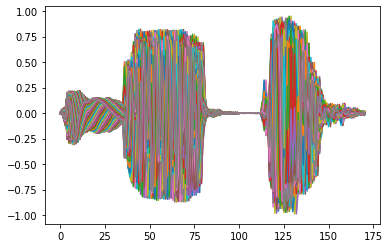

In [7]:
slices = np.asarray(slices)

plt.plot(slices[0])
plt.show()

In [8]:
# windowing function(hanning)
# The Hanning window is a taper(konik) formed by using a weighted cosine.
# The objective is to minimize spectral leakage


def windowing(data, M):
    win = np.hanning(M + 1)[:-1]
    data = data * win
    return data

In [9]:
windows = []

M = 128

for each in range(len(slices)):
    windows.append(windowing(slices[each], M))

In [10]:
windows = np.asarray(windows)

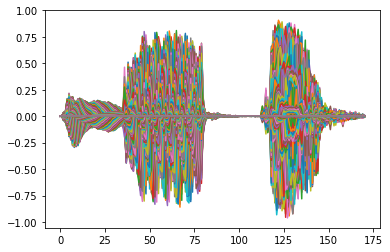

In [11]:
plt.plot(windows[0])
plt.show()

In [12]:
# It’s more convenient to have one slice per column, so we take the transpose:

for each in range(len(windows)):
    windows[each] = windows[each].T

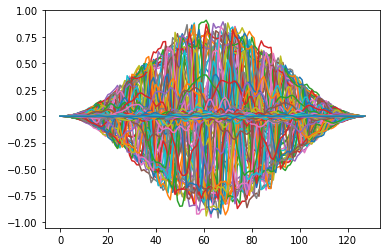

In [13]:
plt.plot(windows[0])
plt.show()

In [14]:
# Compute the one-dimensional discrete Fourier Transform.

# For each window, calculate the FFT, which returns both positive and negative frequencies

def fft(data,M):
    # Nyquest Limit = sample rate / 2
    spectrum = np.fft.fft(data, axis = 0)[:M//2+1 : -1]
    spectrum = np.abs(spectrum)
    return spectrum

In [15]:
spectrums = []

for each in range(len(windows)):
    spectrums.append(fft(windows[each], len(windows[each])))

In [16]:
for each in range(len(spectrums)):
    spectrums[each] = np.array(spectrums[each])

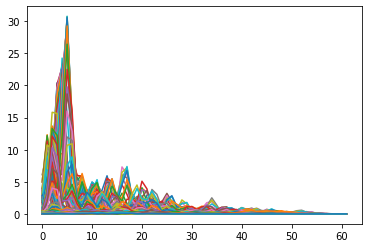

In [17]:
plt.plot(spectrums[0], )
plt.show()

In [18]:
def create_spectrogram(data):
#    data = np.abs(data)
    # The spectrum can contain both very large and very small values. Taking the log compresses the range significantly.
    S = 20 * np.log10(data / np.max(data))
    print(f"Spectrogram L={len(S)} Spectrogram.shape={S.shape}")
    return S

In [19]:
spectrograms = []

for each in range(len(spectrums)):
    spectrograms.append(create_spectrogram(spectrums[each]))

Spectrogram L=62 Spectrogram.shape=(62, 171)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 181)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 157)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 171)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 181)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 157)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 163)
Spectrogram L=62 Spectrogram.shape=(62, 163)
Spectrogram L=62 Spectrogram.shape=(62, 171)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 131)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 151)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 131)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 151)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 131)
Spectrogra

C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 95)
Spectrogram L=62 Spectrogram.shape=(62, 95)
Spectrogram L=62 Spectrogram.shape=(62, 89)
Spectrogram L=62 Spectrogram.shape=(62, 101)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 95)
Spectrogram L=62 Spectrogram.shape=(62, 95)
Spectrogram L=62 Spectrogram.shape=(62, 89)
Spectrogram L=62 Spectrogram.shape=(62, 101)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectr

Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 157)
Spectrogram L=62 Spectrogram.shape=(62, 143)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 149)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 157)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 143)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 149)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 123)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 131)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 115)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 97)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 103)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 115)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 97)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 103)
Spectrogram 

Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 155)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 165)
Spectrogram L=62 Spectrogram.shape=(62, 165)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 155)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 165)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 159)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 113)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 405)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 113)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 405)
Spectrogram L=62 Spectrogram.shape=(62, 127)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 113)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 195)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 139)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 133)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 73)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 105)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 99)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 73)
Spectrogram L=62 Spectrogram.shape=(62, 111)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 117)
Spectrogram L=62 Spectrogram.shape=(62, 105)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 99)
Spectrogram L=62 Spectrogram.shape=(62, 113)
Spectrogram L=62 Spectrogram.shape=(62, 113)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=

Spectrogram L=62 Spectrogram.shape=(62, 73)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 77)
Spectrogram L=62 Spectrogram.shape=(62, 23)
Spectrogram L=62 Spectrogram.shape=(62, 89)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 99)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 73)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 77)
Spectrogram L=62 Spectrogram.shape=(62, 23)
Spectrogram L=62 Spectrogram.shape=(62, 89)
Spectrogram L=62 Spectrogram.shape=(62, 93)
Spectrogram L=62 Spectrogram.shape=(62, 63)
Spectrogram L=62 Spectrogram.shape=(62, 99)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 115)
Spectrogram L=62 Spectrogram.shape=(62, 69)
Spectrogram L=62 Spectrogram.sh

Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 155)
Spectrogram L=62 Spectrogram.shape=(62, 141)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 123)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 129)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogram L=62 Spectrogram.shape=(62, 137)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 123)
Spectrogram L=62 Spectrogram.shape=(62, 135)
Spectrogra

Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 63)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 71)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 75)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 69)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.shape=(62, 63)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 71)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 83)
Spectrogram L=62 Spectrogram.shape=(62, 75)
Spectrogram L=62 Spectrogram.shape=(62, 79)
Spectrogram L=62 Spectrogram.shape=(62, 69)
Spectrogram L=62 Spectrogram.shape=(62, 85)
Spectrogram L=62 Spectrogram.sha

Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 165)
Spectrogram L=62 Spectrogram.shape=(62, 177)
Spectrogram L=62 Spectrogram.shape=(62, 173)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogram L=62 Spectrogram.shape=(62, 107)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 165)
Spectrogram L=62 Spectrogram.shape=(62, 177)
Spectrogram L=62 Spectrogram.shape=(62, 173)
Spectrogram L=62 Spectrogram.shape=(62, 145)
Spectrogram L=62 Spectrogram.shape=(62, 119)
Spectrogram L=62 Spectrogram.shape=(62, 125)
Spectrogram L=62 Spectrogram.shape=(62, 147)
Spectrogram L=62 Spectrogram.shape=(62, 121)
Spectrogra

In [20]:
for each in range(len(spectrograms)):
    spectrograms[each] = np.asarray(spectrograms[each])

In [21]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [22]:
img = []

for each in range(len(spectrograms)):
    img.append(scale_minmax(spectrograms[each], 0, 255).astype(np.uint8))


C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [25]:
# The shape of the array is preserved, but the elements are reordered.
# https://numpy.org/doc/stable/reference/generated/numpy.flip.html

for each in range(len(img)):
    img[each] = np.flip(img[each], axis=0) # put low frequencies at the bottom in image
    img[each] = 255-img[each] # invert. make black==more energy
    
    out = files[each].split('.')[0]
    out = f'{out}.png'
    skimage.io.imsave(out, img[each])

C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: M009_100dB_01_001.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: M009_100dB_04_001.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: M022_100dB_06_001.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: M022_100dB_07_001.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: M024_100dB_04_001.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\e